In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from matplotlib import pyplot as plt
import numpy as np
import math

In [2]:
loss_tracker = keras.metrics.Mean(name="loss")
class Funsol(Sequential):
    @property
    def metrics(self):
        return [loss_tracker] #igual cambia el loss_tracker

    def train_step(self, data):
        batch_size =100 #Calibra la resolucion
        x = tf.random.uniform((batch_size,1), minval=-10, maxval=10)
        f = 3.*tf.math.sin(2.*x) + 5.*tf.math.sin(3.*x)
        #f = tf.math.pow(x,2.)

        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)
            #loss = keras.losses.mean_squared_error(y_pred,eq)
            loss = tf.math.reduce_mean(tf.math.square(y_pred-f))

        grads = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        #actualiza metricas
        loss_tracker.update_state(loss)

        return {"loss": loss_tracker.result()}

In [ ]:
x=tf.random.uniform((3,2), minval=-10, maxval=10)
x.numpy()

array([[ 0.81860733,  2.4811535 ],
       [-1.3631897 , -8.114982  ],
       [ 1.2011051 ,  9.315348  ]], dtype=float32)

In [ ]:
f = tf.math.pow(x,2.)
f.numpy()

array([[ 0.670118 ,  6.1561227],
       [ 1.8582861, 65.85293  ],
       [ 1.4426535, 86.7757   ]], dtype=float32)

In [ ]:
keras.losses.mean_squared_error(x,f)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([   6.763724, 2740.815   , 3000.0825  ], dtype=float32)>

In [ ]:
tf.math.reduce_mean(tf.math.square(x-f))

<tf.Tensor: shape=(), dtype=float32, numpy=1915.8871>

In [ ]:
tf.reduce_mean(tf.math.square(x-eq))

<tf.Tensor: shape=(), dtype=float32, numpy=1551.5668>

In [3]:
model = Funsol()

In [4]:
model.add(Dense(600,activation='tanh', input_shape=(1,)))
model.add(Dense(200,activation='tanh'))
model.add(Dense(200,activation='relu'))
model.add(Dense(1))

model.summary()

Model: "funsol"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 600)               1200      
                                                                 
 dense_1 (Dense)             (None, 200)               120200    
                                                                 
 dense_2 (Dense)             (None, 200)               40200     
                                                                 
 dense_3 (Dense)             (None, 1)                 201       
                                                                 
Total params: 161801 (632.04 KB)
Trainable params: 161801 (632.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
model.compile(optimizer=Adam(learning_rate=0.0001), metrics=['loss'])

In [6]:
x=tf.linspace(-10,10,100)

In [7]:
history = model.fit(x,epochs=10000,verbose=0)

In [ ]:
print(history.history.keys())

dict_keys(['loss'])


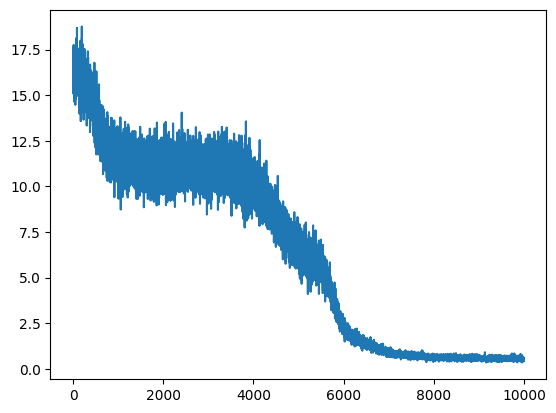

In [8]:
plt.plot(history.history["loss"])

In [9]:
a=model.predict(x)

4/4 [==============================] - 0s 3ms/step


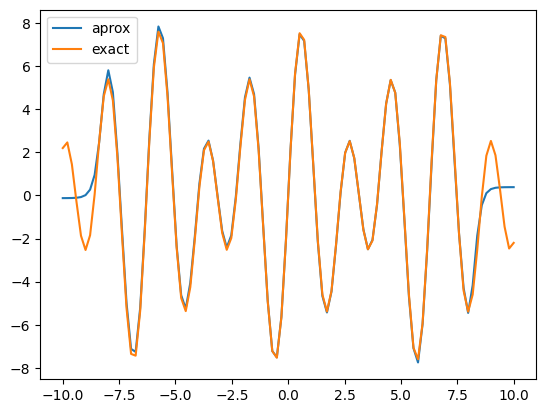

In [10]:
plt.plot(x,a,label="aprox")
plt.plot(x, 3.*tf.math.sin(2.*x) + 5*tf.math.sin(3.*x), label="exact")
#plt.plot(x,tf.math.pow(x,2.),label="exact")
plt.legend()
plt.show()

In [ ]:
loss_tracker = keras.metrics.Mean(name="loss")
class Funsol(Sequential):
    @property
    def metrics(self):
        return [loss_tracker] #igual cambia el loss_tracker

    def train_step(self, data):
        batch_size =10 #Calibra la resolucion
        x = tf.random.uniform((batch_size,1), minval=-10, maxval=10)
        f = 3.*tf.math.sin(2.*x) + 5.*tf.math.sin(3.*x)
        #f = tf.math.pow(x,2.)

        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)
            #loss = keras.losses.mean_squared_error(y_pred,f)
            loss = tf.math.reduce_mean(tf.math.square(y_pred-f))

        grads = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        #actualiza metricas
        loss_tracker.update_state(loss)

        return {"loss": loss_tracker.result()}

In [11]:
class SinTransform(tf.keras.layers.Layer):
    def __init__(self, num_outputs):
        super(SinTransform,self).__init__()
        self.num_outputs = num_outputs

        self.freq = tf.range(1., self.num_outputs + 1)

        self.kernel = self.add_weight("kernel",
                                shape=[self.num_outputs])

    def call(self, inputs):
        inputs = tf.convert_to_tensor(inputs)
        if (inputs.shape == ()):
            inputs=(inputs,)
        elif (len(inputs.shape)==1):
            inputs=tf.expand_dims(inputs, axis=1)
        batch = tf.shape(inputs)[0]
        self.freq_b = tf.ones([batch,1])*self.freq
        args = self.freq_b * inputs
        modes = tf.math.sin(args)
        res = tf.tensordot(modes,self.kernel,1)
        return tf.expand_dims(res, axis=1)

In [12]:
SinTransform(3)([[6.],[5.]])

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[-0.70081574],
       [-0.28124794]], dtype=float32)>

In [ ]:
x=SinTransform(5)

In [ ]:
x([[3.],[5.]])

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[-0.0156523],
       [-0.7790691]], dtype=float32)>

In [13]:
model_F = Funsol()
model_F.add(SinTransform(5))
model_F.build(input_shape=(1,))
model_F.summary()

Model: "funsol_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sin_transform_1 (SinTransf  (1, 1)                    5         
 orm)                                                            
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model_F.compile(optimizer=Adam(learning_rate=0.01), metrics=['loss'])

In [15]:
x=tf.linspace(-10,10,100)
history2 = model_F.fit(x,epochs=500,verbose=0)

In [16]:
print(model_F.layers[0].trainable_weights)

[<tf.Variable 'kernel:0' shape=(5,) dtype=float32, numpy=
array([ 2.6211408e-06,  2.9999933e+00,  4.9999428e+00, -5.5267260e-06,
        3.6435547e-06], dtype=float32)>]


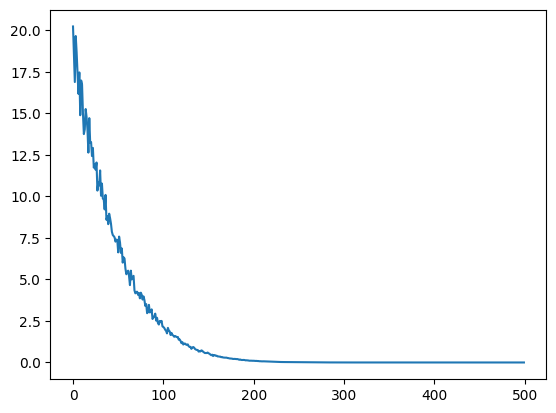

In [17]:
plt.plot(history2.history["loss"])

4/4 [==============================] - 0s 3ms/step


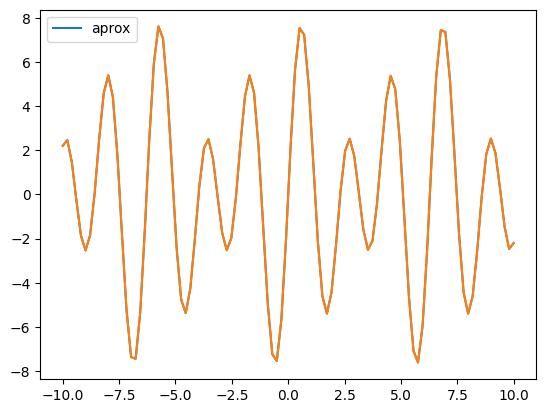

In [18]:
a=model_F.predict(x)
plt.plot(x,a,label="aprox")
plt.plot(x, 3.*tf.math.sin(2.*x) + 5.*tf.math.sin(3.*x))
plt.legend()
plt.show()